## Movie Analysis Project

In [1]:
#necessary imports

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [2]:
#importing data using glob

csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [3]:
#Check type of csv_files so we know what we're working with

type(csv_files)

list

### General Data Cleaning

In [4]:
#Create an empty dictionary

d = {}

In [5]:
#for loop to change from csv files into dictionary

for file in csv_files:
    d[file] = pd.read_csv(file)

In [6]:
#Check the dictionary key values to see if our for loop worked

d.keys()

dict_keys(['./zippedData/imdb.title.crew.csv.gz', './zippedData/tmdb.movies.csv.gz', './zippedData/imdb.title.akas.csv.gz', './zippedData/imdb.title.ratings.csv.gz', './zippedData/imdb.name.basics.csv.gz', './zippedData/imdb.title.basics.csv.gz', './zippedData/tn.movie_budgets.csv.gz', './zippedData/bom.movie_gross.csv.gz', './zippedData/imdb.title.principals.csv.gz'])

In [7]:
#Clean the names of the keys and create new dictionary

csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [8]:
#Check for loop worked
csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

In [9]:
#Explore information around the datasets

for key in csv_files_dict:
     print(key, csv_files_dict[key].info())

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(2)
memory usage: 3.3+ MB
imdb_title_crew_gz None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
tmdb_movies_gz None
<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
ordering             331703 non-null int64
title       

### Data Cleaning (Duplicates)

In [10]:
#Check for duplicates in the data

for db in csv_files_dict.keys():
    print(db, 'contains ', csv_files_dict[db].duplicated().sum(), ' duplicates')

imdb_title_crew_gz contains  22915  duplicates
tmdb_movies_gz contains  1020  duplicates
imdb_title_akas_gz contains  2220  duplicates
imdb_title_ratings_gz contains  45074  duplicates
imdb_name_basics_gz contains  239  duplicates
imdb_title_basics_gz contains  122  duplicates
tn_movie_budgets_gz contains  0  duplicates
bom_movie_gross_gz contains  11  duplicates
imdb_title_principals_gz contains  114187  duplicates


In [11]:
#Create a function to remove duplicates in dataframes for later use

def clean_duplicates(dataframe): #returns a dataframe without duplicates
    cleaned_filter = dataframe.duplicated()
    index_to_drop = dataframe.loc[cleaned_filter].index
    return dataframe.drop(index=index_to_drop)

### Exploring the Data we are interested in

__We have decided to explore the relationship of data around:__

* Profit / Genre 

* Profit / Genre / Time

* Gross / Studio / Time

### Question 1 - How has Film Genre affected profit over the years?

#Let's explore what data we should use for our profit variable


In [12]:
#From info table above it looks like 2 datasets this information

df_bom_financials = csv_files_dict['bom_movie_gross_gz'] 

df_tn_financials = csv_files_dict['tn_movie_budgets_gz'] 

#### Dataset - bom_movie_gross_gz

##### Data Exploration

In [13]:
#Let's explore/clean df_bom_financials first

df_bom_financials.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
df_bom_financials.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [15]:
#Let's test for NaN values that may affect our data

df_bom_financials.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

###### Checking the Value Counts

In [16]:
#Domestic

items_counts_for = df_bom_financials['domestic_gross'].value_counts(normalize = True)
print(items_counts_for)

1100000.0      0.009527
1000000.0      0.008931
1300000.0      0.008931
1200000.0      0.007443
1400000.0      0.006847
                 ...   
68800.0        0.000298
87000000.0     0.000298
739000.0       0.000298
336000000.0    0.000298
727000.0       0.000298
Name: domestic_gross, Length: 1797, dtype: float64


In [17]:
#Foreign

items_counts_for = df_bom_financials['foreign_gross'].value_counts(normalize = True)
print(items_counts_for)

1200000      0.011291
1100000      0.006873
1900000      0.005891
4200000      0.005891
1300000      0.005400
               ...   
226800000    0.000491
93700000     0.000491
432000       0.000491
415000       0.000491
441000       0.000491
Name: foreign_gross, Length: 1204, dtype: float64


##### Data Cleaning

We will make the assumption that NaN = 0 from assumption 0 is a common value.

In [18]:
#Create a function to change Nan to 0s

def NaN_to_zero(DataFrame, DataSeries, change_into=0):
    filt = DataSeries.isna()
    DataFrame.loc[filt] = change_into
    return DataFrame

In [19]:
#Use the Nan_to_zero function and check that it's worked

NaN_to_zero(df_bom_financials, df_bom_financials.foreign_gross)

NaN_to_zero(df_bom_financials, df_bom_financials.domestic_gross)

df_bom_financials.isna().sum()

studio            2
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [20]:
#Now let's check the type of our data for foreign as it's detailed object 

type(df_bom_financials.foreign_gross[0])

str

###### Dealing with datatypes

In [21]:
#Now let's write function to convert our columns from string to float

def convert_amt_to_float(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('float')
    return df

In [22]:
#Convert the foreign column into a float

money_cols = ['foreign_gross']

for col in money_cols:
    df_bom_financials = convert_amt_to_float(df_bom_financials, col)

##### Column Creation

In [23]:
#Let's create a new column for total gross

df_bom_financials['total_gross'] = df_bom_financials['foreign_gross'].add(df_bom_financials['domestic_gross'], 
                                                                          fill_value=0.0)
df_bom_financials.head()

,studio,domestic_gross,foreign_gross,year,total_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


#### Dataset - tn_movie_budgets_gz

##### Data Exploration

In [24]:
#Let's explore/clean df_tn_financials

df_tn_financials.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [25]:
df_tn_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB


In [26]:
#Let's test for NaN values that may affect our data

df_tn_financials.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

##### Data Cleaning


In [27]:
#Now let's write function to convert our columns from string to float

def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('float')
    return df

In [28]:
#Now let's convert strings to floats using our function


money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    df_tn_financials = convert_amt_to_int(df_tn_financials, col)

#### Dataframe Comparison

In [29]:
#We should compare the two datasets to see if they are suitable for a merge

#Let's find out how many entries in each dataset

tn = len(df_tn_financials.movie)

print(tn)

5782


In [30]:
bom = len(df_bom_financials.reset_index().title)

print(bom)

3387


In [31]:
#We can find out how many individuals there would be merged with the data

tn_movies_unique = list(df_tn_financials.movie.unique())

bom_movies_unique = list(df_bom_financials.reset_index().title.unique()) 

len(set(tn_movies_unique + bom_movies_unique))

7846

In [32]:
#Let's examine the dataframes to get a feel of movie title formats

df_tn_financials.sort_values(by=['domestic_gross'], ascending=False).head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09
34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09
27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09


In [33]:
df_bom_financials.sort_values(by=['domestic_gross'], ascending=False).head(10)

,studio,domestic_gross,foreign_gross,year,total_gross
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,9.367011e+08
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08
Jurassic World,Uni.,652300000.0,1019.4,2015,6.523010e+08
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,1.056100e+09
Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09


From looking at the data we can conclude that the format is different with several entries

we decided to stick with one dataset to avoid data duplication 

df_tn_financials is the larger dataset and is now has clean data.

As we have the production budget available, we can create a new column which will have the profits the movie has made.

#### Profit + Profit Margin Columns

In [34]:
#Now let's create a total profit column

df_tn_financials['total_profit'] = df_tn_financials['worldwide_gross'].subtract(df_tn_financials['production_budget'],
                                                                                fill_value=0.0)
df_tn_financials.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [35]:
#Now let's create a profit margin column

df_tn_financials['profit_margin'] = df_tn_financials['total_profit'].div(df_tn_financials['worldwide_gross'],
                                                                         fill_value=0.0)
df_tn_financials.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,0.759251


#### Genre

In [36]:
#From info table above it looks like 2 datasets this information

df_tmdb_genre = csv_files_dict['tmdb_movies_gz'] 

df_imdb_genre = csv_files_dict['imdb_title_basics_gz'] 

#### Dataset - tmdb_movies_gz

##### Data Exploration

In [37]:
#We will start with df_tmdb_genre

df_tmdb_genre.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [38]:
df_tmdb_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [39]:
#Large dataframe but will require further analysis to convert genre ids

#### Dataset - imdb_title_basics_gz

##### Data Exploration

In [40]:
#Next set is df_imdb_genre

df_imdb_genre.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [41]:
df_imdb_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


We have decided to work with this dataframe due to sheer size

In [42]:
#Exploration into the genre NaN values

df_imdb_genre['genres'].isna().sum()

5408

##### Data Cleaning

In [43]:
#Remove all rows with NaN values in genres

df_imdb_genre = df_imdb_genre[df_imdb_genre['genres'].notna()]

In [44]:
#Check it NaN's are removed
df_imdb_genre['genres'].isna().sum()

0

#### Dataframe with Genre / Profit details

In [45]:
#Now we have a clean data frame let's dataframes

#Using merge and using a left join. As col names are different, using left_on and right_on options

movie_details_df = pd.merge(df_tn_financials, df_imdb_genre, left_on=  ['movie'],
                   right_on= ['primary_title'], 
                   how = 'left')

# Cleaning duplicates
movie_details_df = clean_duplicates(movie_details_df)

In [46]:
#Check the dataframe

movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,0.759251,NaN,NaN,NaN,NaN,NaN


In [47]:
#Check the shape

movie_details_df.shape

(7158, 12)

In [48]:
#Check the information

movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7158 entries, 0 to 7161
Data columns (total 12 columns):
release_date         7158 non-null object
movie                7158 non-null object
production_budget    7158 non-null float64
domestic_gross       7158 non-null float64
worldwide_gross      7158 non-null float64
total_profit         7158 non-null float64
profit_margin        7158 non-null float64
primary_title        3739 non-null object
original_title       3739 non-null object
start_year           3739 non-null float64
runtime_minutes      3309 non-null float64
genres               3739 non-null object
dtypes: float64(7), object(5)
memory usage: 727.0+ KB


##### Data Cleaning

In [49]:
#Removing NaN values from genres column

movie_details_df = movie_details_df[movie_details_df['genres'].notna()]

In [50]:
#Check shape without NaNs
movie_details_df.shape

(3739, 12)

In [51]:
#Genre is a list of upto 3 genres, splitting it to get the individual genres

movie_details_df['genres'] = movie_details_df['genres'].apply(lambda x: x.split(",") if x else x)
movie_details_df.head()



,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,Avatar,Abatâ,2011.0,93.0,[Horror]
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]"
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,Dark Phoenix,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]"
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]"
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,0.853525,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"


In [52]:
#Select only the first value in the list in genre column

single_genres = pd.DataFrame(movie_details_df['genres'].values.tolist()).iloc[:, [0]]
movie_details_df['genres'] = single_genres 

In [53]:
#Check it worked

movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Action
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,Dark Phoenix,Dark Phoenix,2019.0,113.0,Action
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,Action
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,0.853525,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,Action


#### Data Selection (Groupby)

In [54]:
#Drop the columns which aren't useful

genre_profit_df = (movie_details_df.drop(columns=['release_date', 
                                                  'primary_title',
                                                  'original_title', 
                                                  'runtime_minutes']))
genre_profit_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,start_year,genres
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,2011.0,Horror
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,2011.0,Action
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,2019.0,Action
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,2015.0,Action
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,0.853525,2018.0,Action


In [55]:
#Let's group by genre averages

genre_mean_df = genre_profit_df.groupby('genres').mean()
genre_mean_df.head()

,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,start_year
genres,,,,,,
Action,9.194141e+07,9.996662e+07,2.666722e+08,1.747307e+08,-inf,2014.482323
Adventure,9.442440e+07,1.318566e+08,3.353786e+08,2.409542e+08,-inf,2014.467153
Animation,6.620833e+07,5.496093e+07,1.397203e+08,7.351201e+07,-inf,2014.333333
Biography,4.677212e+07,5.554827e+07,1.252284e+08,7.845633e+07,-inf,2014.096154
Comedy,4.197176e+07,5.283243e+07,1.105751e+08,6.860331e+07,-inf,2014.302326


In [56]:
#Sort by top genres profits - decreasing

genre2_mean_df = genre_mean_df.sort_values(by='total_profit', ascending=False)
genre_mean_df.head()

,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,start_year
genres,,,,,,
Action,9.194141e+07,9.996662e+07,2.666722e+08,1.747307e+08,-inf,2014.482323
Adventure,9.442440e+07,1.318566e+08,3.353786e+08,2.409542e+08,-inf,2014.467153
Animation,6.620833e+07,5.496093e+07,1.397203e+08,7.351201e+07,-inf,2014.333333
Biography,4.677212e+07,5.554827e+07,1.252284e+08,7.845633e+07,-inf,2014.096154
Comedy,4.197176e+07,5.283243e+07,1.105751e+08,6.860331e+07,-inf,2014.302326


In [57]:
#To keep graph neat let's select the top 10 genres

genres_top10_df = genre2_mean_df[:10]
genres_top10_df.head()

,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,start_year
genres,,,,,,
War,7.810000e+07,2.500696e+08,5.820177e+08,5.039177e+08,0.830122,2014.000000
Adventure,9.442440e+07,1.318566e+08,3.353786e+08,2.409542e+08,-inf,2014.467153
Fantasy,9.566667e+07,1.323254e+08,2.908258e+08,1.951592e+08,0.210089,2014.500000
Action,9.194141e+07,9.996662e+07,2.666722e+08,1.747307e+08,-inf,2014.482323
Family,7.620000e+07,7.251056e+07,2.158495e+08,1.396495e+08,-inf,2015.500000


#### Graphs

__Profit / Genre (since 2010) (*)__ 

Text(0.5, 1.0, 'Profit by Genre')

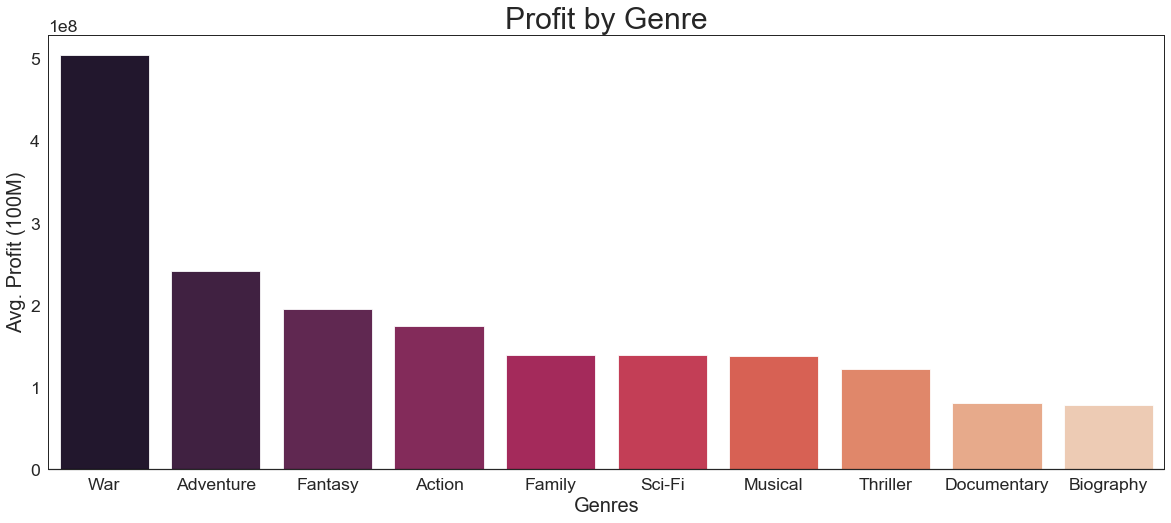

In [58]:
#Create a bar chart of average profit of each genre - Profit / Genre 

genres_top10_df.reset_index(inplace=True)


sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
sns.set_style("white")
plt.figure(figsize=(20,8))
ax = sns.barplot(x='genres', y='total_profit', palette="rocket", data=genres_top10_df);
ax.set(xlabel="Genres", ylabel = "Avg. Profit (100M)")
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Profit by Genre', fontsize=30)

#### __Profit / Genre (since 2010) BoxPlot (*)__ 

In [59]:
movie_details_df.reset_index(inplace=True)


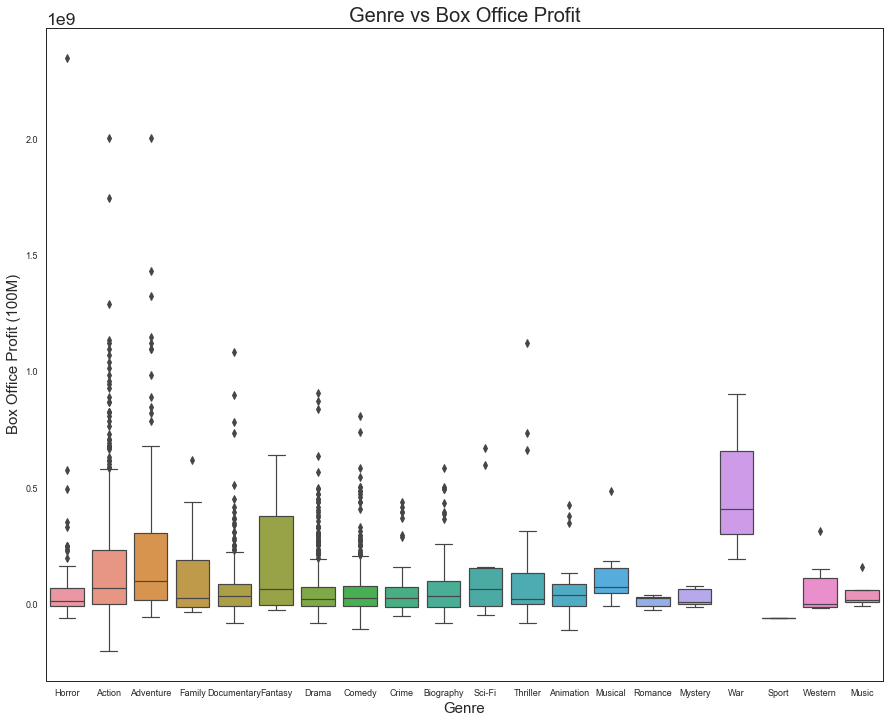

In [60]:
plt.figure(figsize=(15,12))

b = sns.boxplot(x="genres", y=('total_profit'), data=movie_details_df)
b.axes.set_title("Genre vs Box Office Profit",fontsize=20)
b.set_xlabel("Genre",fontsize=15)
b.set_ylabel("Box Office Profit (100M)",fontsize=15)
b.tick_params(labelsize=9)
b.set_ylim=([150000000,0])

In [61]:
#Now let's look at total profit / genre / time

time_genre_profit_df = genre_profit_df.groupby(['start_year', 'genres']).sum()
time_genre_profit_df.head()

production_budget  domestic_gross  worldwide_gross  \
start_year genres                                                          
2010.0     Action          3.176000e+09    3.463153e+09     9.436612e+09   
           Adventure       1.257200e+09    1.503738e+09     3.659146e+09   
           Animation       1.700000e+08    1.094866e+08     4.446598e+08   
           Biography       4.240000e+08    6.297386e+08     1.527856e+09   
           Comedy          1.613500e+09    2.037063e+09     3.927171e+09   

                      total_profit  profit_margin  
start_year genres                                  
2010.0     Action     6.260612e+09       7.449449  
           Adventure  2.401946e+09       0.333305  
           Animation  2.746598e+08       1.737541  
           Biography  1.103856e+09       2.902645  
           Comedy     2.313671e+09    -328.621200

__total profit / genre / time__

[Text(0, 0.5, 'Total Profit (Billions)'), Text(0.5, 0, 'Year')]

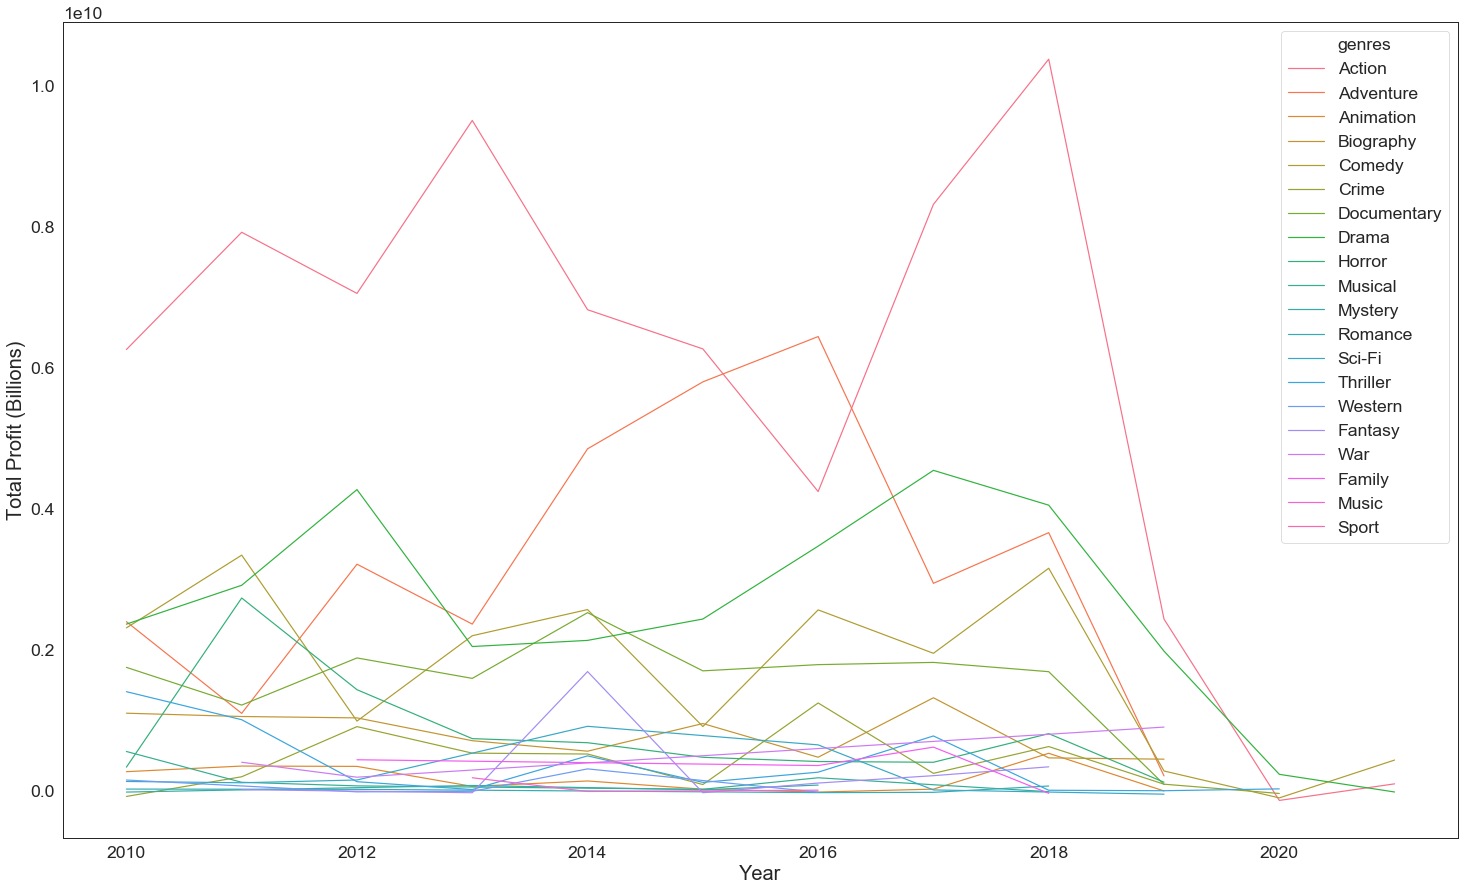

In [62]:
#Create a line graph with this table - 

line_df = time_genre_profit_df.reset_index()
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(25,15))
px = sns.lineplot(x="start_year", y="total_profit", hue="genres",
                  data=line_df)

px.set(xlabel="Year", ylabel = "Total Profit (Billions)")

In [63]:
#To get results that remove some of the less common genres

#We group by the first level of the index

top_genres_df = time_genre_profit_df['total_profit'].groupby(level=0, group_keys=False)

In [64]:
#Then we want to sort ('order') each group and take the first 12 elements:

time2_genre_profit = top_genres_df.nlargest(12) 
time2_genre_profit.head()

start_year  genres     
2010.0      Action         6.260612e+09
            Adventure      2.401946e+09
            Drama          2.366754e+09
            Comedy         2.313671e+09
            Documentary    1.753701e+09
Name: total_profit, dtype: float64

In [65]:
#Let's check the type

type(time2_genre_profit)

pandas.core.series.Series

In [66]:
#Convert to Dataframe

time2_genre_profit_df = time2_genre_profit.to_frame()

__Total Profit of Top 12 Genres each year__

[Text(0, 0.5, 'Total Profit (Billions)'), Text(0.5, 0, 'Year')]

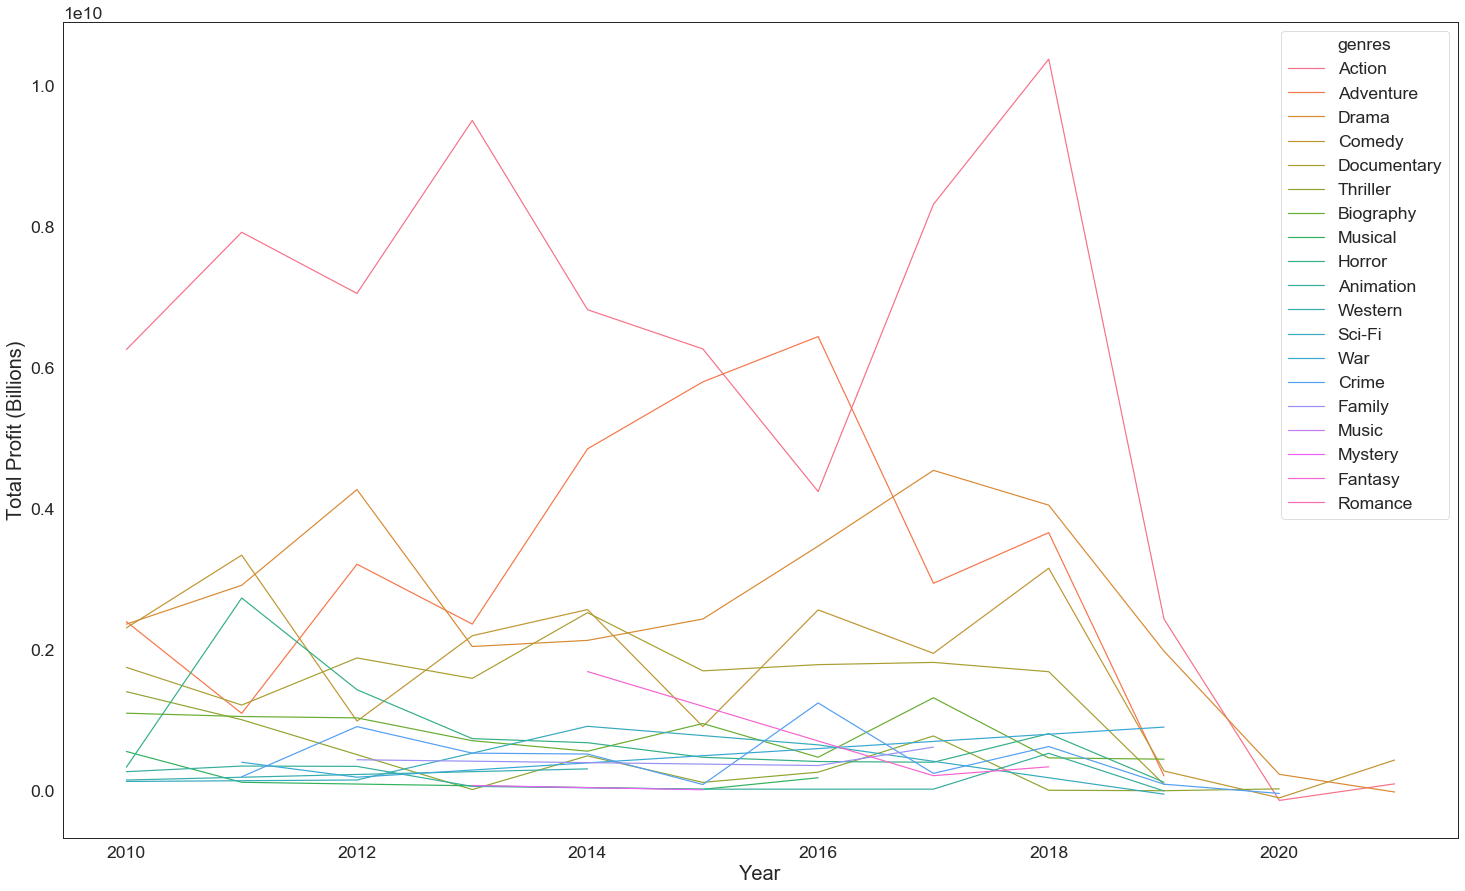

In [67]:
#Create alternative linegraph for total_profit / genre of top 12 genres each year - Profit / Genre / Time

time2_genre_profit_df = time2_genre_profit_df.reset_index()

sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(25,15))
px2 = sns.lineplot(x="start_year", y="total_profit", hue="genres",
                  data=time2_genre_profit_df)
px2.set(xlabel="Year", ylabel = "Total Profit (Billions)")

In [68]:
#Let's do some quick analysis to see amount of data in years

(genre_profit_df.start_year == 2018.0).sum()

343

In [69]:
(genre_profit_df.start_year == 2019.0).sum()

185

In [70]:
(genre_profit_df.start_year == 2020.0).sum()

15

In [71]:
#As we can see that 2019 & 2020 have less data 


In [72]:
#Lets remove

time3_genre_profit_df_2018 = genre_profit_df[(genre_profit_df.start_year != 2021.0 ) 
                                             & (genre_profit_df.start_year != 2020.0) 
                                             & (genre_profit_df.start_year != 2019.0)]


In [73]:
time4_genre_profit_df_2018 = time3_genre_profit_df_2018.groupby(['start_year', 'genres']).sum()

In [74]:
time4_genre_profit_df_2018.tail()

production_budget  domestic_gross  worldwide_gross  \
start_year genres                                                         
2018.0     Fantasy         207000000.0     218080025.0     5.505174e+08   
           Horror          563500000.0     722861039.0     1.377346e+09   
           Musical          40000000.0       6115824.0     3.096368e+07   
           Romance         163000000.0     156929840.0     2.345359e+08   
           Thriller         37000000.0      22450975.0     4.844680e+07   

                     total_profit  profit_margin  
start_year genres                                 
2018.0     Fantasy    343517357.0       0.623990  
           Horror     813845731.0     -13.907398  
           Musical     -9036316.0      -0.291836  
           Romance     71535941.0       0.634625  
           Thriller    11446802.0       0.236276

__Total Profit of Top 12 Genres each year (No 2020 or 2021) (*)__

Text(0.5, 1.0, 'Profit of Top 12 Genres')

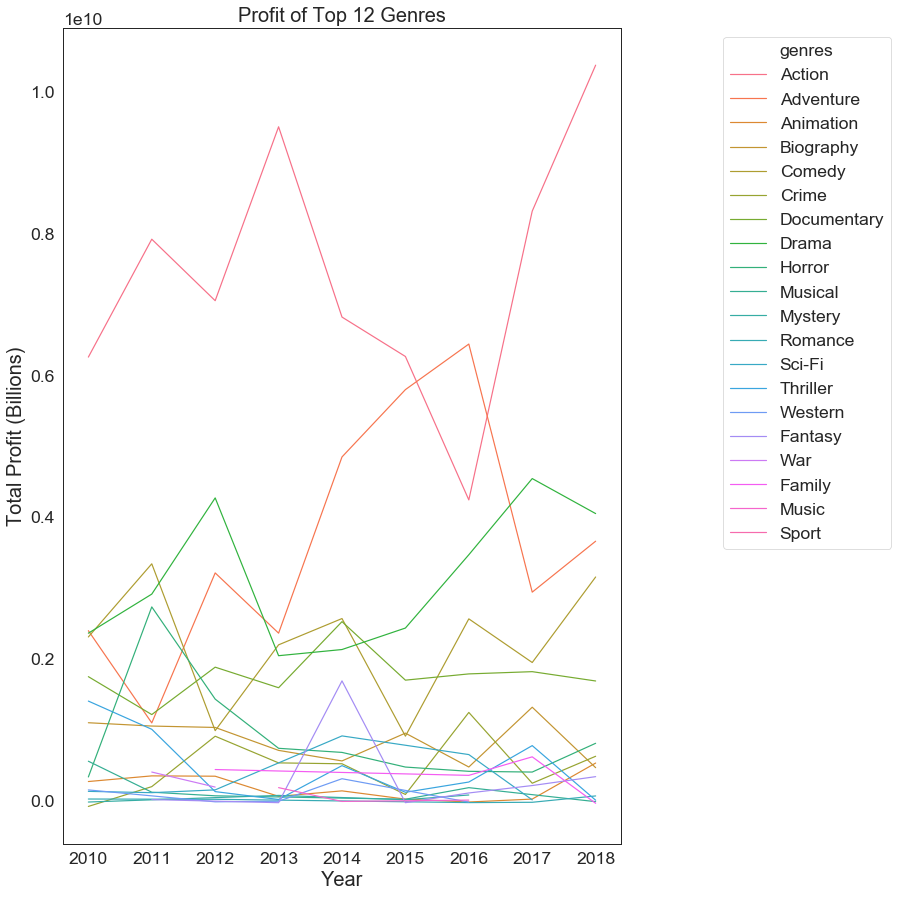

In [75]:
#Create alternative linegraph for total_profit / genre of top 12 genres each year - Profit / Genre / Time (no 2020,21)

time4_genre_profit_df_2018 = time4_genre_profit_df_2018.reset_index()

sns.set_palette("dark")
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(10,15))
px2 = sns.lineplot(x="start_year", y="total_profit", hue="genres", legend='brief',
                  data=time4_genre_profit_df_2018)
px2.set(xlabel="Year", ylabel = "Total Profit (Billions)")
px2.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
px2.set_title('Profit of Top 12 Genres', fontsize=20)


### Question 2 - Which production companies have been the highest grossing over time?

Let's explore Gross / Studio / Time

From previous analyis we will use df_bom_financials for studio & total grossing

From previous analysis we will use df_imdb_genre for genre

#### Dataframe with Gross / Studio details

In [76]:
#Both datasets are clean 

#Using merge and using a left join. As col names are different, using left_on and right_on options

studio_movie_details_df = pd.merge(df_bom_financials, df_imdb_genre, left_on=  ['title'],
                   right_on= ['primary_title'], 
                   how = 'left')

# Cleaning duplicates
studio_movie_details_df = clean_duplicates(studio_movie_details_df)
                                
studio_movie_details_df.head()

,studio,domestic_gross,foreign_gross,year,total_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy"
1,BV,334200000.0,691300000.0,2010,1.025500e+09,NaN,NaN,NaN,NaN,NaN
2,WB,296000000.0,664300000.0,2010,9.603000e+08,NaN,NaN,NaN,NaN,NaN
3,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi"
4,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy"


In [77]:
studio_movie_details_df.shape

(3787, 10)

In [78]:
studio_movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3787 entries, 0 to 4106
Data columns (total 10 columns):
studio             3785 non-null object
domestic_gross     3787 non-null float64
foreign_gross      2452 non-null float64
year               3787 non-null int64
total_gross        3787 non-null float64
primary_title      3324 non-null object
original_title     3324 non-null object
start_year         3324 non-null float64
runtime_minutes    3185 non-null float64
genres             3324 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 325.4+ KB


#### Data Cleaning

In [79]:
#removing Nan values
studio_movie_details_df = studio_movie_details_df[studio_movie_details_df['genres'].notna()]

In [80]:
studio_movie_details_df.shape

(3324, 10)

In [81]:
#Genre is a list of upto 3 genres, splitting it to get the individual genres

studio_movie_details_df['genres'] = studio_movie_details_df['genres'].apply(lambda x: x.split(",") if x else x)
studio_movie_details_df.head()

,studio,domestic_gross,foreign_gross,year,total_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,Toy Story 3,2010.0,103.0,"[Adventure, Animation, Comedy]"
3,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,Inception,2010.0,148.0,"[Action, Adventure, Sci-Fi]"
4,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,Shrek Forever After,2010.0,93.0,"[Adventure, Animation, Comedy]"
5,Sum.,300500000.0,398000000.0,2010,6.985000e+08,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010.0,124.0,"[Adventure, Drama, Fantasy]"
6,Par.,312400000.0,311500000.0,2010,6.239000e+08,Iron Man 2,Iron Man 2,2010.0,124.0,"[Action, Adventure, Sci-Fi]"


In [82]:
#Writing code to select first genre value in each row

single_genres = pd.DataFrame(studio_movie_details_df['genres'].values.tolist()).iloc[:, [0]]
studio_movie_details_df['genres'] = single_genres 
studio_movie_details_df.head()

,studio,domestic_gross,foreign_gross,year,total_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,Toy Story 3,2010.0,103.0,Adventure
3,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,Inception,2010.0,148.0,Adventure
4,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,Shrek Forever After,2010.0,93.0,Action
5,Sum.,300500000.0,398000000.0,2010,6.985000e+08,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010.0,124.0,Adventure
6,Par.,312400000.0,311500000.0,2010,6.239000e+08,Iron Man 2,Iron Man 2,2010.0,124.0,Animation


#### Data Selection (groupby)

In [83]:
#Now let's drop the columns we dont need

studio_gross_details_df = (studio_movie_details_df.drop(columns=['start_year', 
                                                                 'original_title', 
                                                                 'runtime_minutes']))
studio_gross_details_df.head()

,studio,domestic_gross,foreign_gross,year,total_gross,primary_title,genres
0,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,Adventure
3,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,Adventure
4,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,Action
5,Sum.,300500000.0,398000000.0,2010,6.985000e+08,The Twilight Saga: Eclipse,Adventure
6,Par.,312400000.0,311500000.0,2010,6.239000e+08,Iron Man 2,Animation


In [84]:
#We should group by year and studio

year_graph_studio = studio_gross_details_df.groupby(['year', 'studio']).sum()
year_graph_studio.head()

domestic_gross  foreign_gross  total_gross
year studio                                            
0    0                  0.0            0.0          0.0
2010 3D           6100000.0      9900000.0   16000000.0
     ATO          1000000.0        40700.0    1040700.0
     Anch.          93100.0       480000.0     573100.0
     App.         7200000.0      2200000.0    9400000.0

In [85]:
year2_graph_studio = studio_gross_details_df.groupby(['year', 'studio']).mean()
year2_graph_studio.head()

domestic_gross  foreign_gross  total_gross
year studio                                            
0    0                  0.0            NaN          0.0
2010 3D           6100000.0      9900000.0   16000000.0
     ATO          1000000.0        40700.0    1040700.0
     Anch.          93100.0       480000.0     573100.0
     App.         3600000.0      1100000.0    4700000.0

In [86]:
#Data Cleaning
#Drop all rows that equal 0
year_graph_studio = year_graph_studio.loc[~(year_graph_studio==0).all(axis=1)]

#### Top 7 Gross Producing Studio's each year

To avoid smaller production companies crowding the bottom of our graph

We select the the top 7 gross producing studio per year

We group by the first level of the index:

In [87]:
#To avoid smaller production companies crowding the bottom of our graph

#We select the the top 7 gross producing studio per year

#We group by the first level of the index:

g = year_graph_studio['total_gross'].groupby(level=0, group_keys=False)

In [88]:
#Then we want to sort ('order') each group and take the first 7 elements:

topseven_prod_comp_year = g.nlargest(7) 
topseven_prod_comp_year.head()

year  studio
2010  Uni.      2.961497e+09
      Fox       2.955400e+09
      WB        2.482156e+09
      BV        2.434937e+09
      Sum.      2.093400e+09
Name: total_gross, dtype: float64

In [89]:
#Let's check the type

type(topseven_prod_comp_year)

pandas.core.series.Series

In [90]:
#Convert to DataFrame

s = topseven_prod_comp_year.to_frame()

#### Total Gross of top 7 studios each year - Graph (*)

Text(0.5, 1.0, 'Total Gross of the Top 7 Studios')

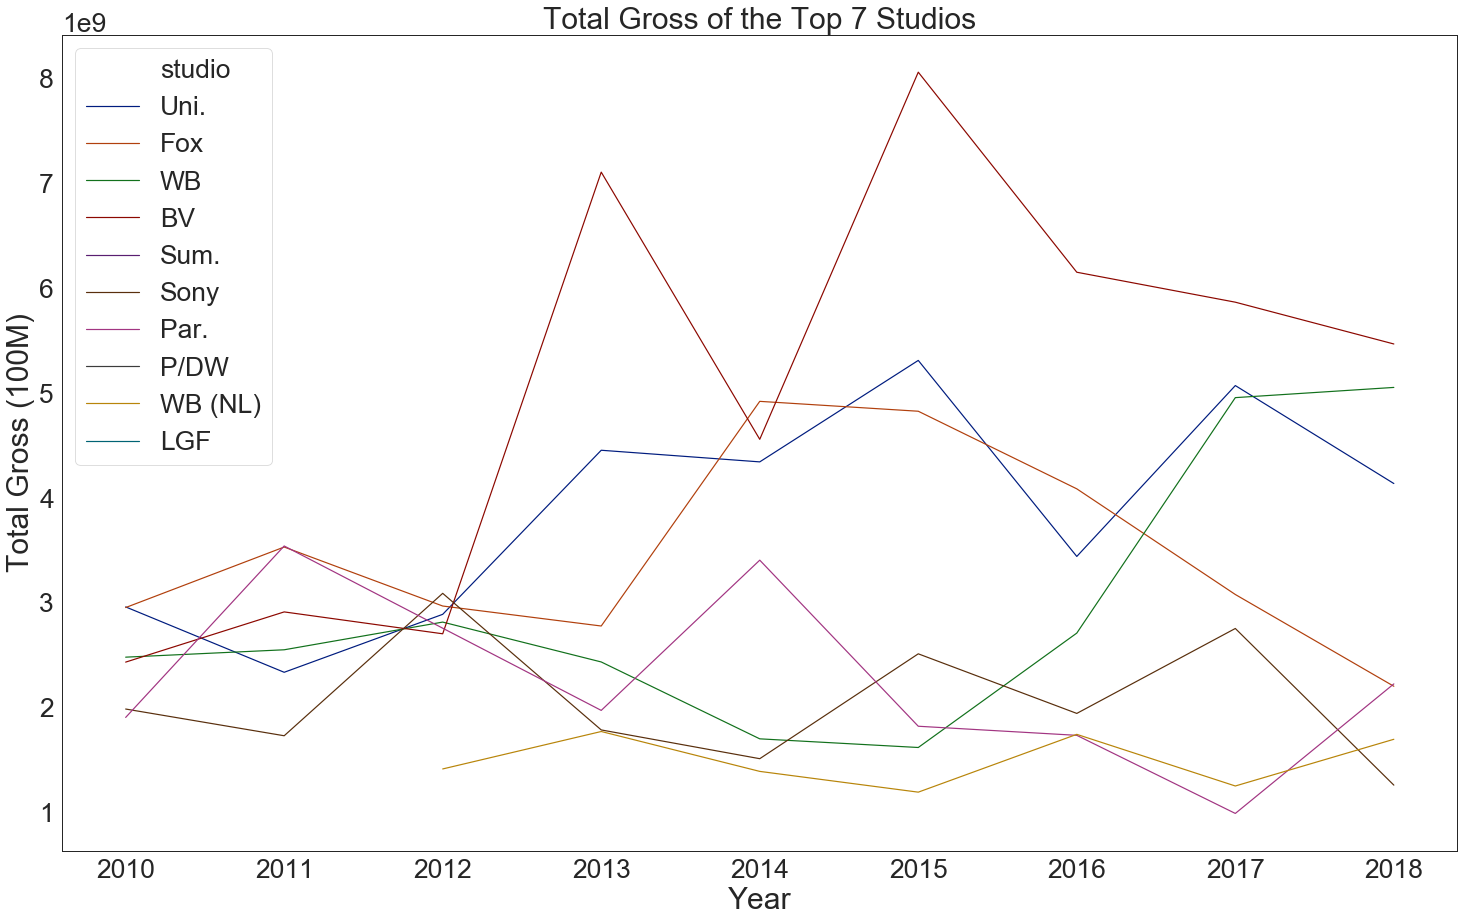

In [91]:
#Reset Index & graphing total gross of top 7 studios each year 

df_year_2 = s.reset_index()

sns.set_palette("dark")
sns.set_context("paper", font_scale = 3, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 30
plt.figure(figsize=(25,15))
px3 = sns.lineplot(x="year", y="total_gross", hue="studio",
                  data=df_year_2)
px3.set(xlabel="Year", ylabel = "Total Gross (100M)")
px3.set_title('Total Gross of the Top 7 Studios', fontsize=30)


#### How many fims are the leading studios making?

In [92]:
#Lets find out how many films top competitors are making

#Groupby studio and year

count_graph_year = studio_gross_details_df.groupby(['studio','year']).count()
count_graph_year.head()

domestic_gross  foreign_gross  total_gross  primary_title  genres
studio year                                                                   
0      0               1334              0         1334           1334    1039
3D     2010               1              1            1              1       1
A24    2013               2              2            2              2       2
       2014               4              4            4              4       4
       2015               3              3            3              3       3

In [93]:
#Delete all rows = 0

count_graph_year = count_graph_year.loc[~(count_graph_year==0).all(axis=1)]

In [94]:
#Select the top competitors from the graph above 

top_comp_year = count_graph_year.loc[['Uni.','Fox','WB','BV','Sum.','Sony',
                                      'Par.','P/DW','WB (NL)','LGF']]

In [95]:
top_comp_year.reset_index(inplace=True)

#### How many films are the leading studios making? - Graph (*)

[Text(0, 0.5, 'Amount of Films Created'), Text(0.5, 0, 'Year')]

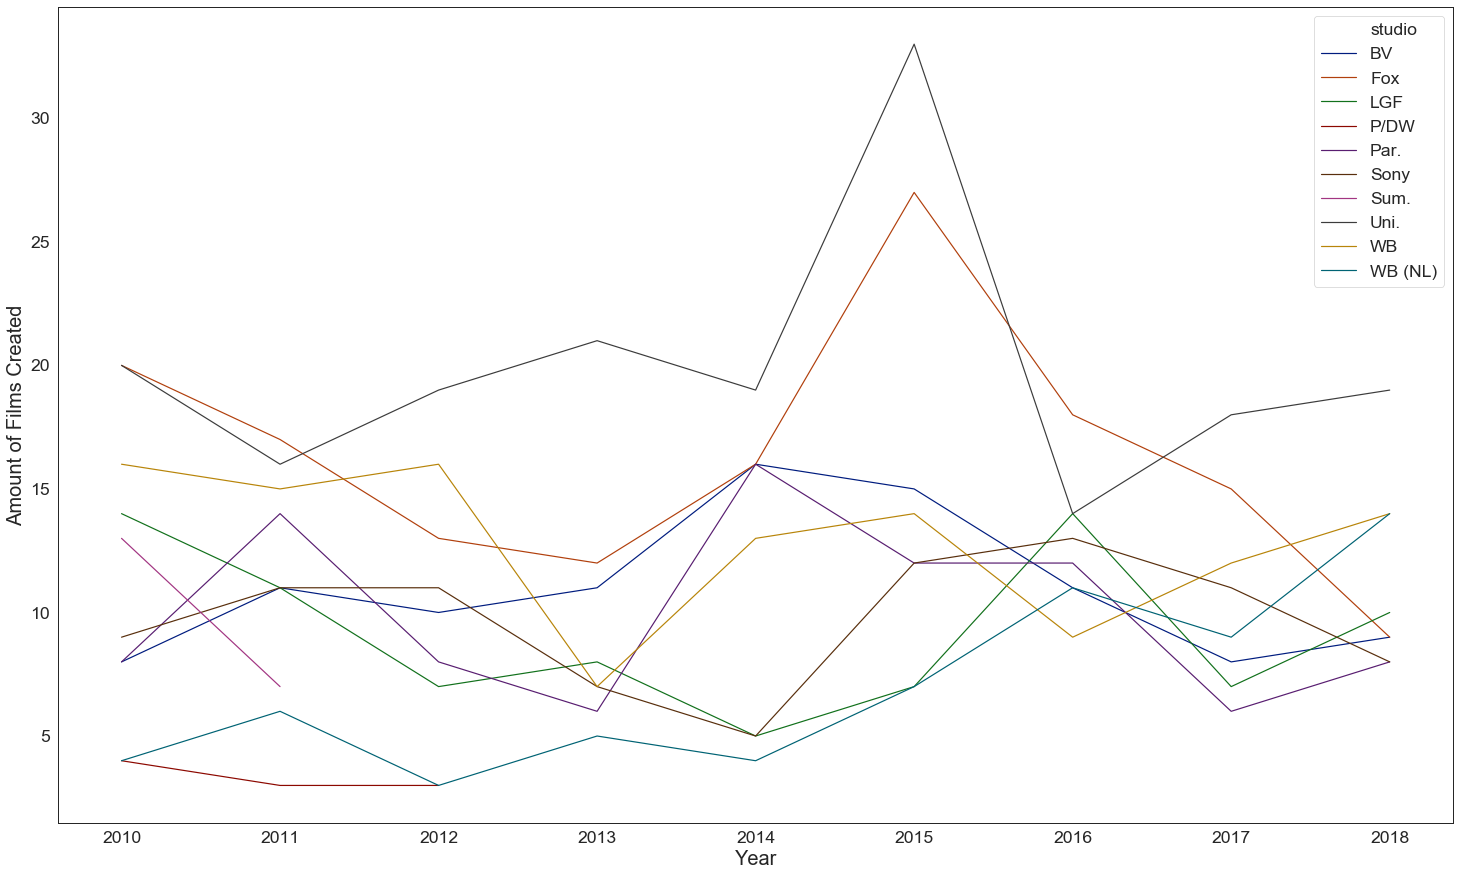

In [96]:
#Plot graph of top studios number of movies per year


sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(25,15))
px2 = sns.lineplot(x="year", y='domestic_gross', hue="studio",
                  data=top_comp_year)
px2.set(xlabel="Year", ylabel = "Amount of Films Created")

#### What types of films are the leaders in the industry making?

In [97]:
#Now let's have a look at what genres of films our top competitors are making

#Drop columns that arent of interest

noyear_new_studio_movie_details_df = (studio_movie_details_df.drop(columns=['start_year',
                                                                            'original_title', 
                                                                            'runtime_minutes', 
                                                                            'year']))

In [98]:
#Groupby studio 

sum_graph_studio = noyear_new_studio_movie_details_df.groupby(['studio']).sum()

In [99]:
#Add count of genres with studio

count_graph = noyear_new_studio_movie_details_df.groupby(['studio','genres']).count()

In [100]:
#Select most common highest grossing studios 

top_comp = count_graph.loc[['Uni.','Fox','WB','BV','Sum.','Sony',
                            'Par.','P/DW','WB (NL)','LGF']]

In [101]:
#Create bar chart of most common genres from our top competitors

top_comp .head()

domestic_gross  foreign_gross  total_gross  primary_title
studio genres                                                              
BV     Action                 24             24           24             24
       Adventure               4              4            4              4
       Animation               1              1            1              1
       Biography               2              2            2              2
       Comedy                 14             14           14             14

In [102]:
#Sort by top genres profits - decreasing

top_comp_2 = top_comp.sort_values(by='domestic_gross', ascending=False)
top_comp_2.head()

domestic_gross  foreign_gross  total_gross  primary_title
studio genres                                                           
Uni.   Action              42             42           42             42
       Drama               32             32           32             32
Fox    Action              31             31           31             31
       Drama               30             30           30             30
Uni.   Comedy              27             27           27             27

#### What types of films are the leaders in the industry making? - Graph

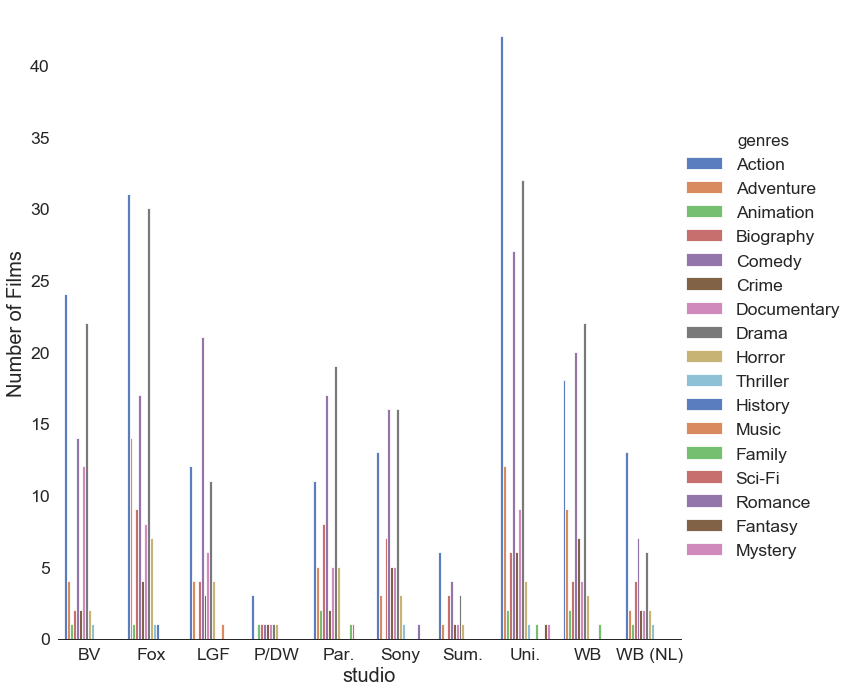

In [103]:
df_year_4 = top_comp.reset_index()

g = sns.catplot(x="studio", y="domestic_gross", hue="genres", data=df_year_4,
                height=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Number of Films")

#### What types of films are the leaders in the industry making? (since 2010) - Descending Graph (*)

<Figure size 2160x2160 with 0 Axes>

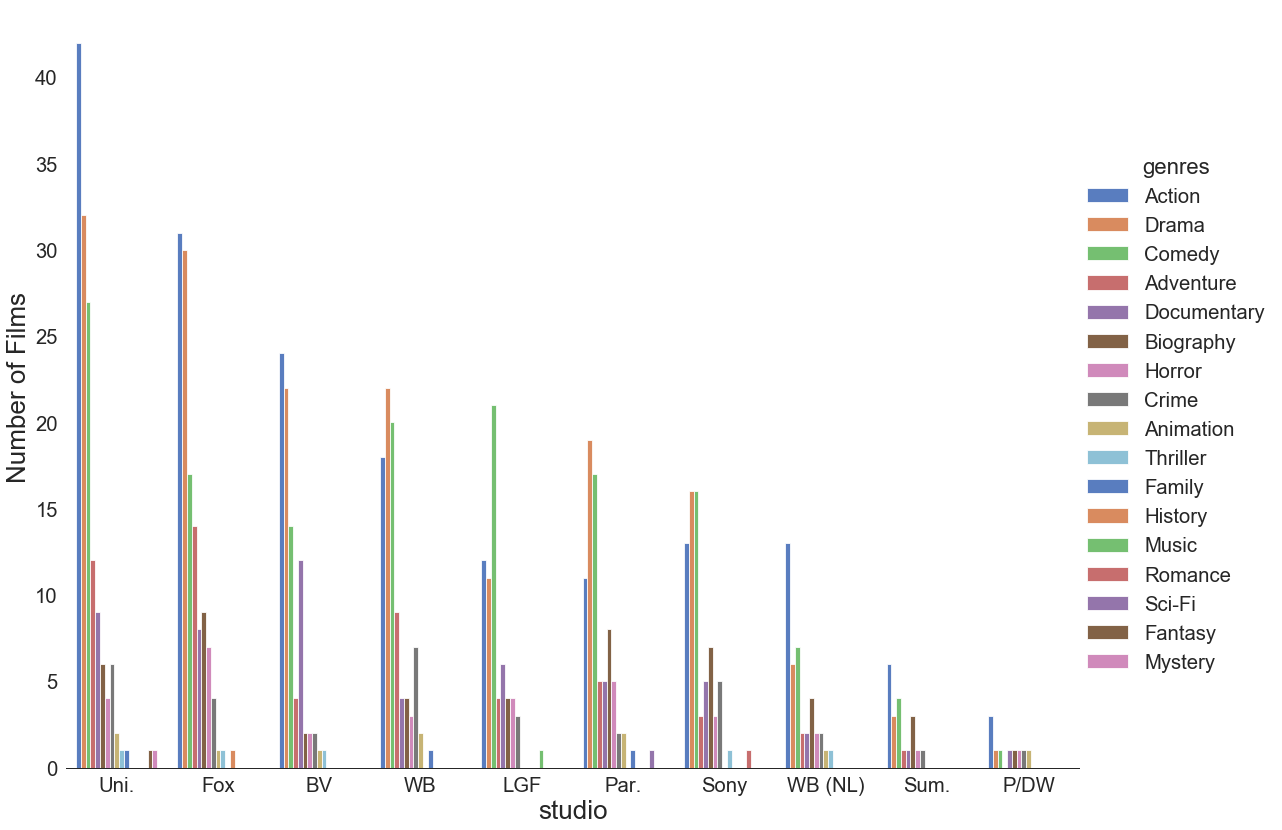

In [104]:
df_year_5 = top_comp_2.reset_index()

sns.set_palette("bright")
sns.set_context("paper", font_scale = 2.3, rc={"grid.linewidth": 0.5})
plt.rcParams["axes.labelsize"] = 26
plt.figure(figsize=(30,30))
g = sns.catplot(x="studio", y="domestic_gross", hue="genres", data=df_year_5,
                height=12, aspect=1.3, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Number of Films")


### How do Directors, Actors and Producers affect the grossing of movies?

Let's explore Job Role / Gross

From previous analyis we will use tn_movie_budgets for total grossing

We will merge with imdb_title_akas

We will use imdb_name_basics for job roles

In [105]:
#Creating the DataFrames we will be using

df_tn_financials = csv_files_dict['tn_movie_budgets_gz'] 

df_imd_title = csv_files_dict['imdb_title_akas_gz'] 

df_imdb_name_basics = csv_files_dict['imdb_name_basics_gz'] 


#### Data Cleaning and Exploration

In [106]:
#String to datetime format for the column release_date for df_tn_financials

df_tn_financials.release_date = pd.to_datetime(df_tn_financials.release_date)

In [107]:
#Merging the DFs  **imdb_title_akas_gz**  and **tn_movie_budgets_gz** 
#Merging on the movie name, so we import the title_id 
#From the imdb tables to the new merged DF with financials

df_imdb_monetary = pd.merge(df_imd_title.reset_index(), 
                              df_tn_financials, left_on='title',
                            right_on='movie', how='inner')


df_imdb_monetary.drop(columns=['ordering', 'movie', 'region', 'language',
                               'types',
       'attributes', 'is_original_title'], inplace=True)


#Cleaning duplicates
df_imdb_monetary = pd.DataFrame(clean_duplicates(df_imdb_monetary))

In [108]:
#Let's make sure it worked

df_imdb_monetary.head()

,title_id,title,release_date,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin
0,tt0369610,Jurassic World,2015-06-12,215000000.0,652270625.0,1.648855e+09,1.433855e+09,0.869606
14,tt0401729,John Carter,2012-03-09,275000000.0,73058679.0,2.827781e+08,7.778100e+06,0.027506
27,tt1014759,Alice in Wonderland,2010-03-05,200000000.0,334191110.0,1.025491e+09,8.254911e+08,0.804971
28,tt1014759,Alice in Wonderland,1951-07-28,3000000.0,0.0,0.000000e+00,-3.000000e+06,-inf
33,tt1926979,Alice in Wonderland,2010-03-05,200000000.0,334191110.0,1.025491e+09,8.254911e+08,0.804971


In [109]:
#Check the inforomation

df_imdb_monetary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4143 entries, 0 to 10607
Data columns (total 8 columns):
title_id             4143 non-null object
title                4143 non-null object
release_date         4143 non-null datetime64[ns]
production_budget    4143 non-null float64
domestic_gross       4143 non-null float64
worldwide_gross      4143 non-null float64
total_profit         4143 non-null float64
profit_margin        4143 non-null float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 291.3+ KB


In [110]:
#Calculates the profit and add it as a column to **df_imdb_monetary**

df_imdb_monetary['total_profit'] =  df_imdb_monetary.worldwide_gross - df_imdb_monetary.production_budget

df_imdb_monetary.set_index('title_id', inplace=True)

In [111]:
#Data cleaning for **imdb_name_basics_gz**

#Splits the string values in primary_profession and known_for_titles into a list of strings

df_imdb_name_basics['primary_profession'] = df_imdb_name_basics['primary_profession'].str.split(',')
df_imdb_name_basics['known_for_titles'] = df_imdb_name_basics['known_for_titles'].str.split(',')

In [112]:
#Deletes row with NaN either on known_for_titles column or on primary_profession

#Selects index of rows to delete

filt1 = df_imdb_name_basics.known_for_titles.isna()
filt2 = df_imdb_name_basics.primary_profession.isna()

#Merge them into a set

index_to_drop = set( list( df_imdb_name_basics.loc[filt1].index ) 
                    + list( df_imdb_name_basics.loc[filt2].index ))


df_imdb_name_basics.drop(index=index_to_drop, inplace=True)

In [113]:
#Create function that takes as arguments:
    # a series containing lists of professions 
    # a profession to screen for 
    # a second profession (optional)
    
#iterates through series and returns 1 when profession is found, 
#or 0 if not found

def is_prof(series, profession1, profession2=None):
    
    prof_list = []
    
    # iterates through series
    for lst in series:
        # tests for profession 
        if (profession1 in lst):
            prof_list.append(1)
        else: 
            # and tests for second profession (optional) 
            if (profession2) and (profession2 in lst):
                prof_list.append(1)
            else:
                prof_list.append(0)
    
    prof_dict = {('is_' + str(profession1)): prof_list}
    return pd.DataFrame(prof_dict)



In [114]:
#Adds features to **df_imdb_name_basics** by using the custom function is_prof


#index reset to facilitate creation of features
df_imdb_name_basics.reset_index(inplace=True) 


    #new columns that tell if the person is a:
    
        #an actor/actress
actor_col = is_prof(df_imdb_name_basics.primary_profession, 
                           'actor', profession2='actress')

df_imdb_name_basics['is_actor'] = actor_col.reset_index().is_actor


        #a producer 
prod_col = is_prof(df_imdb_name_basics.primary_profession, 
                              'producer')

df_imdb_name_basics['is_producer'] = prod_col.reset_index().is_producer

        #a director 
dir_col = is_prof(df_imdb_name_basics.primary_profession, 
                              'director')

df_imdb_name_basics['is_director'] = dir_col.reset_index().is_director

In [115]:
#Check it worked

df_imdb_name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,is_actor,is_producer,is_director
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"[miscellaneous, production_manager, producer]","[tt0837562, tt2398241, tt0844471, tt0118553]",0,1,0
1,nm0061865,Joseph Bauer,NaN,NaN,"[composer, music_department, sound_department]","[tt0896534, tt6791238, tt0287072, tt1682940]",0,0,0
2,nm0062070,Bruce Baum,NaN,NaN,"[miscellaneous, actor, writer]","[tt1470654, tt0363631, tt0104030, tt0102898]",1,0,0
3,nm0062195,Axel Baumann,NaN,NaN,"[camera_department, cinematographer, art_depar...","[tt0114371, tt2004304, tt1618448, tt1224387]",0,0,0
4,nm0062798,Pete Baxter,NaN,NaN,"[production_designer, art_department, set_deco...","[tt0452644, tt0452692, tt3458030, tt2178256]",0,0,0


In [116]:
#Cleans away rows of people who are neither a director, an actor nor a producer 

filt = (df_imdb_name_basics.is_actor 
        + df_imdb_name_basics.is_director 
        + df_imdb_name_basics.is_producer) == 0

index_to_drop = df_imdb_name_basics.loc[filt].index

df_imdb_name_basics.drop(
    index=index_to_drop, inplace=True)

In [117]:
# Creates two new columns to **df_imdb_name_basics** :
    
#   avg_grossing: will contain the average grossing of movies
#                   the person is known for
    
#   total_grossing: will contain the sum of grossing of movies
#                   the person is known for 
    

# Will contain values selected for new avg_grossing colum    

avg_grossing_column = [] 

# Will contain values selected for new avg_grossing colum

total_grossing_column = [] 


for row in df_imdb_name_basics.known_for_titles:
    
    # Colects the numbers computed for each row 
    grossing_row = [] 
    
    for movie in row:
        
        # checks if the movie being parsed is contained in the df_imdb_monetary, 
        # which is where we can fetch the grossing figures
        if movie in df_imdb_monetary.index: 
            
            # if a movie has more then one version (different relase dates, for ex),  
            # the loop will return a data series (slice of df_imdb_monetary) instead
            # of a single value
            if isinstance(df_imdb_monetary.loc[movie], pd.DataFrame):
                
                # in that case, we select the last value
                grossing = df_imdb_monetary.loc[movie].iloc[-1,-1]
            
            # otherwise the single value found is selected
            else:
                grossing = df_imdb_monetary.worldwide_gross.loc[movie] 
                
            # appends the value found to 
            # grossing_row for further computation
            grossing_row.append(grossing)
            
    # if after parsing the row, something is found:
    if len(grossing_row) > 0:
        
        # the average is calculated and appended to avg_grossing
        avg_grossing = sum(grossing_row)/len(grossing_row)
        avg_grossing_column.append(avg_grossing)
        
         #the total is calculated and appended to total_grossing
        total_grossing_column.append(sum(grossing_row))
        
    # otherwise 0 is appended so that the final series
    # is the correct length 
    else:
        avg_grossing_column.append(0)
        total_grossing_column.append(0)

# Dictionary with computed values

dict_grossings = {'avg_grossing': avg_grossing_column,
                  'total_grossing': total_grossing_column}

# New DF with computed values

df_professionals_grossings = pd.DataFrame(dict_grossings)

In [118]:
# We now add new columns from the newly created ***df_professionals_grossings***  
# Into  ***df_imdb_name_basics***


# Resets index in order to create the new columns that match df_professionals_grossings

df_imdb_name_basics.reset_index(inplace=True)
df_imdb_name_basics.drop(columns='index', inplace=True)

# Creates the new columns
df_imdb_name_basics['avg_grossing'] = df_professionals_grossings.loc[:,'avg_grossing']
df_imdb_name_basics['total_grossing'] = df_professionals_grossings.loc[:,'total_grossing']


# Additional data cleaning - drops columns **birth_year**  and  **primary_profession** 

df_imdb_name_basics.drop(columns=['birth_year','primary_profession'], inplace=True)

In [119]:
# Additional cleaning - drops rows where **avg_grossing** is zero

filt = df_imdb_name_basics["avg_grossing"] == 0
index_to_drop = df_imdb_name_basics.loc[filt].index

df_imdb_name_basics.drop(index=index_to_drop,inplace=True)

#### Data Visualisation

We now want to plot Directors, Actors and Producers most associated with high grossing movies



In [120]:
# Creates subsets of **df_imdb_name_basics** for Directors, Actors and Producers

filt = df_imdb_name_basics.is_director == 1
df_directors = df_imdb_name_basics.loc[filt]

filt1 = df_imdb_name_basics.is_actor == 1
df_actors = df_imdb_name_basics.loc[filt1]

filt2 = df_imdb_name_basics.is_producer == 1
df_producers = df_imdb_name_basics.loc[filt2]

In [121]:
# Prepares the data to be plotted


# total number of movies
n_movies = len(df_imdb_monetary)

# total number of directors
n_directors = len(df_directors)
n_actors = len(df_actors)
n_producers = len(df_producers)


# DF with the average movie grossings of the top 1% , top 10%, and the bottom 99% of movies
# from **df_imdb_monetary**, which contains the financial data cross referenced with
# information from imdb

plotdata_imdb_financials = pd.DataFrame({
    
    'Top 1% vs Rest': [df_imdb_monetary.worldwide_gross.nlargest(n=int(n_movies*0.01)).mean(),
                        df_imdb_monetary.worldwide_gross.nlargest(n=int(n_movies*0.99)).mean()],
    
    'Top 1% vs Top 10%' : [df_imdb_monetary.worldwide_gross.nlargest(n=int(n_movies*0.01)).mean(),
                        df_imdb_monetary.worldwide_gross.nlargest(n=int(n_movies*0.1)).mean()]},
    index = [0, 1])


# DFs with the average movie grossings of the top 1% , top 10%, 
# and the bottom 99% of directors, actors and producers 
# from **df_imdb_name_basics**, 
# which contains the main movies a person is known for

plotdata_directors = pd.DataFrame({
    
    'Top 1% vs Rest': [df_directors.avg_grossing.nlargest(n=int(n_directors*0.01)).mean(),
                  df_directors.avg_grossing.nlargest(n=int(n_directors*0.99)).mean()],
    
    'Top 1% vs Top 10%' : [df_directors.avg_grossing.nlargest(n=int(n_directors*0.01)).mean(),
                  df_directors.avg_grossing.nlargest(n=int(n_directors*0.1)).mean()]},
    
    index = [0, 1])


plotdata_actors = pd.DataFrame({
    
    'Top 1% vs Rest': [df_actors.avg_grossing.nlargest(n=int(n_actors*0.01)).mean(),
                  df_actors.avg_grossing.nlargest(n=int(n_actors*0.99)).mean()],
    
    'Top 1% vs Top 10%' : [df_actors.avg_grossing.nlargest(n=int(n_actors*0.01)).mean(),
                  df_actors.avg_grossing.nlargest(n=int(n_actors*0.1)).mean()]},
    index = [0, 1])
    
plotdata_producers = pd.DataFrame({
    
    'Top 1% vs Rest': [df_producers.avg_grossing.nlargest(n=int(n_producers*0.01)).mean(),
                  df_producers.avg_grossing.nlargest(n=int(n_producers*0.99)).mean()],
    
    'Top 1% vs Top 10%' : [df_producers.avg_grossing.nlargest(n=int(n_producers*0.01)).mean(),
                  df_producers.avg_grossing.nlargest(n=int(n_producers*0.1)).mean()]},
    
    index = [0, 1])

Text(0.5, 1.0, 'Top Grossing Producers \nTop 1% vs Top 10%')

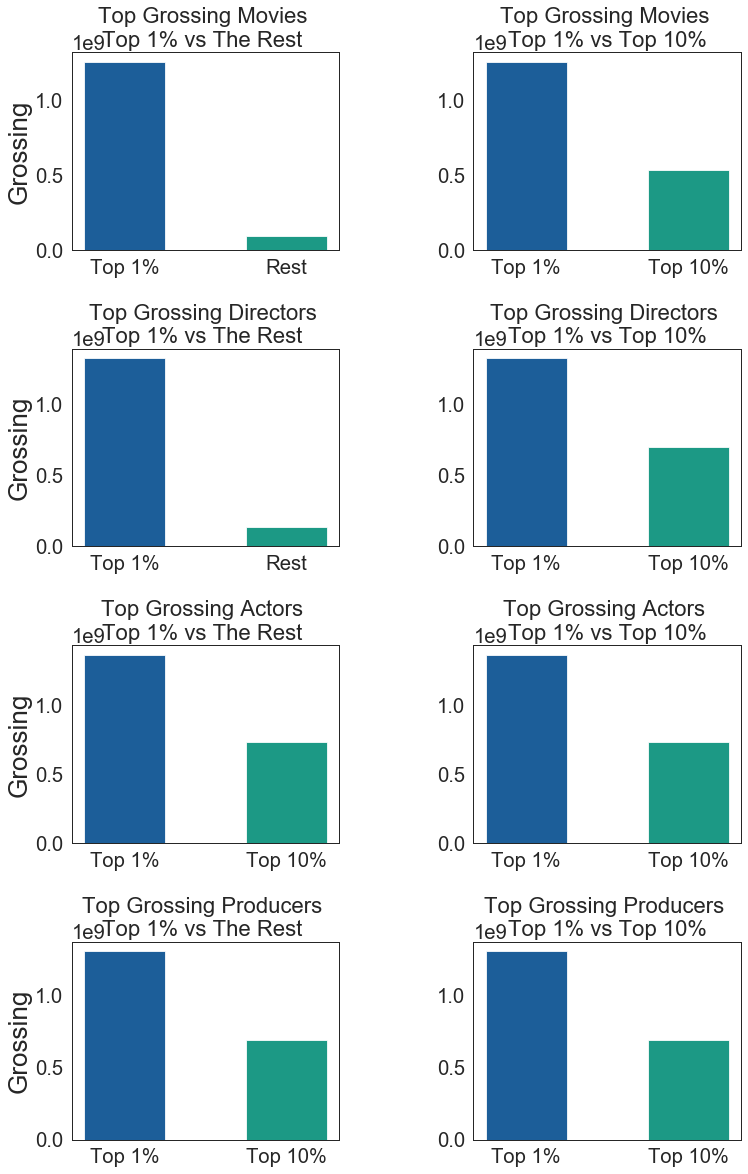

In [124]:
plt.figure(figsize=(12,20)).subplots_adjust( wspace=0.5, hspace=0.5)

Xr = ['Top 1%', 'Rest']
Xt = ['Top 1%', 'Top 10%']
Y = [10, 4]

ax1 = plt.subplot(421)
ax1.bar(Xr, plotdata_imdb_financials['Top 1% vs Rest'], 
        width = 0.5, color=['#1C5E99', '#1C9985'], )

ax2 = plt.subplot(422)
ax2.bar(Xt, plotdata_imdb_financials['Top 1% vs Top 10%'], 
        width = 0.5, color=['#1C5E99', '#1C9985'])

ax3 = plt.subplot(423)
ax3.bar(Xr, plotdata_directors['Top 1% vs Rest'], 
        width = 0.5, color=['#1C5E99', '#1C9985'])

ax4 = plt.subplot(424)
ax4.bar(Xt, plotdata_directors['Top 1% vs Top 10%'], 
        width = 0.5, color=['#1C5E99', '#1C9985'])

ax5 = plt.subplot(425)
ax5.bar(Xt, plotdata_actors['Top 1% vs Top 10%'], 
        width = 0.5, color=['#1C5E99', '#1C9985'])

ax6 = plt.subplot(426)
ax6.bar(Xt, plotdata_actors['Top 1% vs Top 10%'], 
        width = 0.5, color=['#1C5E99', '#1C9985'])

ax7 = plt.subplot(427)
ax7.bar(Xt, plotdata_producers['Top 1% vs Top 10%'], 
        width = 0.5, color=['#1C5E99', '#1C9985'])

ax8 = plt.subplot(428)
ax8.bar(Xt, plotdata_producers['Top 1% vs Top 10%'], 
        width = 0.5, color=['#1C5E99', '#1C9985'])

ax1.set_title("""Top Grossing Movies 
Top 1% vs The Rest """)
ax1.set_ylabel("Grossing")

ax2.set_title("""Top Grossing Movies 
Top 1% vs Top 10%""")


ax3.set_title("""Top Grossing Directors 
Top 1% vs The Rest """)
ax3.set_ylabel("Grossing")

ax4.set_title("""Top Grossing Directors 
Top 1% vs Top 10%""")

ax5.set_title("""Top Grossing Actors 
Top 1% vs The Rest """)
ax5.set_ylabel("Grossing")

ax6.set_title("""Top Grossing Actors 
Top 1% vs Top 10%""")

ax7.set_title("""Top Grossing Producers 
Top 1% vs The Rest """)
ax7.set_ylabel("Grossing")

ax8.set_title("""Top Grossing Producers 
Top 1% vs Top 10%""")